Here's a tutorial on creating a preference profile using different Ballot Generation models


In [33]:
import votekit.ballot_generator as bg
from votekit.plots.profile_plots import plot_summary_stats
import matplotlib.pyplot as plt
import numpy as np

first we will need to define the parameters to our ballot generators


In [2]:
# parameters
number_of_ballots = 100
candidates = ["W1", "W2", "C1", "C2"]
slate_to_candidate = {"W": ["W1", "W2"], "C": ["C1", "C2"]}
bloc_crossover_rate = {"W": {"C": 0.3}, "C": {"W": 0.4}}
pref_interval_by_bloc = {
    "W": {"W1": 0.4, "W2": 0.3, "C1": 0.2, "C2": 0.1},
    "C": {"W1": 0.2, "W2": 0.2, "C1": 0.3, "C2": 0.3},
}
bloc_voter_prop = {"W": 0.7, "C": 0.3}

next, let's instantiate our ballot generators


In [14]:
ic = bg.ImpartialCulture(candidates=candidates)
iac = bg.ImpartialAnonymousCulture(candidates=candidates)
pl = bg.PlackettLuce(pref_interval_by_bloc=pref_interval_by_bloc,
                     bloc_voter_prop=bloc_voter_prop, candidates=candidates)
bt = bg.BradleyTerry(pref_interval_by_bloc=pref_interval_by_bloc,
                     bloc_voter_prop=bloc_voter_prop, candidates=candidates)
ac = bg.AlternatingCrossover(pref_interval_by_bloc=pref_interval_by_bloc,
                             bloc_voter_prop=bloc_voter_prop, candidates=candidates,
                             slate_to_candidate=slate_to_candidate, bloc_crossover_rate=bloc_crossover_rate)
cs = bg.CambridgeSampler(pref_interval_by_bloc=pref_interval_by_bloc,
                         bloc_voter_prop=bloc_voter_prop, candidates=candidates,
                         slate_to_candidate=slate_to_candidate, bloc_crossover_rate=bloc_crossover_rate)

/var/folders/b4/_njd1bdd02gbnm5ybyykbzm00000gn/T/ipykernel_63460/4043289985.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


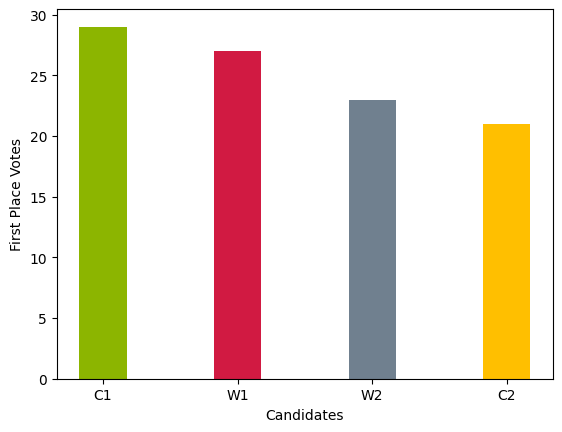

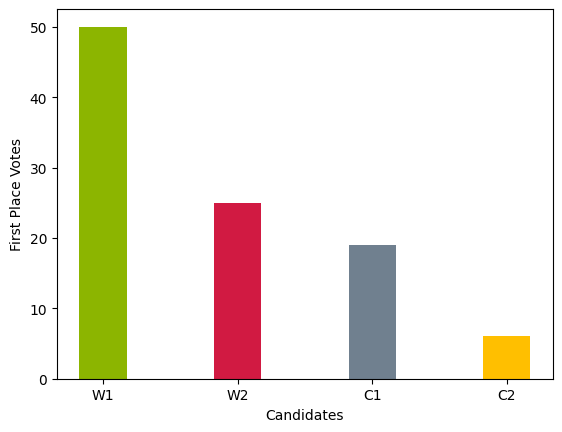

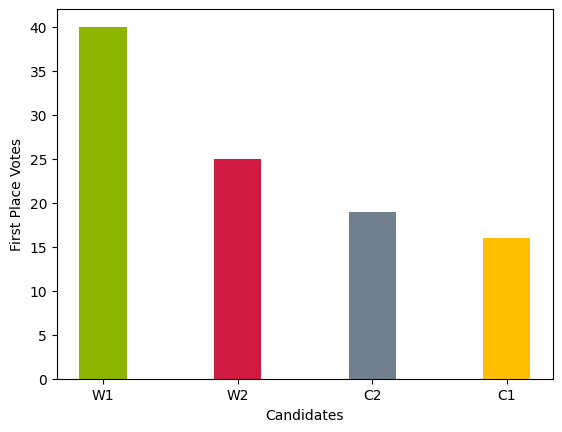

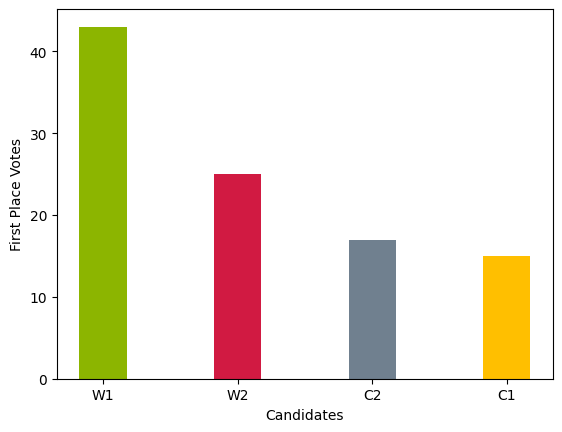

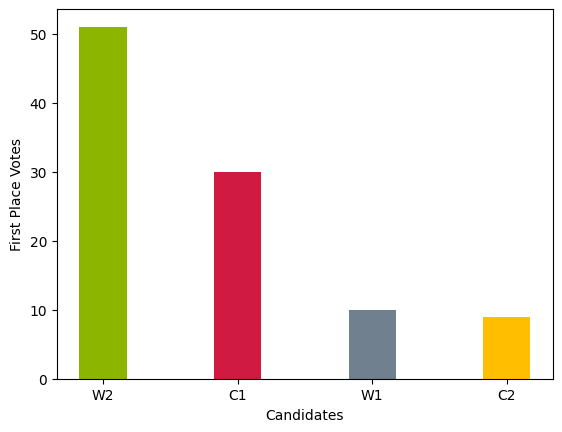

In [49]:
bgs = [ic, iac, pl, bt, ac]

first_place_plots = []

for generator in bgs:
    profile = generator.generate_profile(number_of_ballots)
    fig = plot_summary_stats(profile, 'first place votes')
    first_place_plots.append(fig)

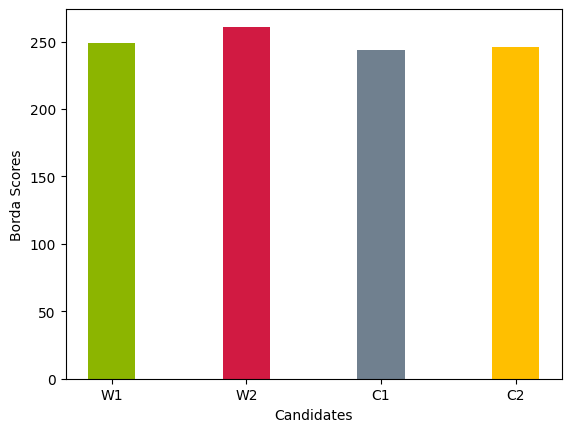

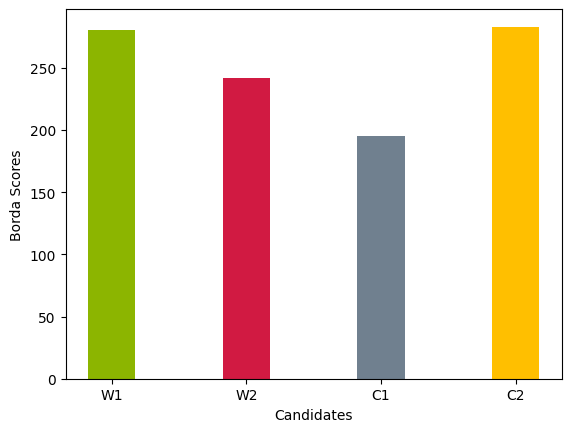

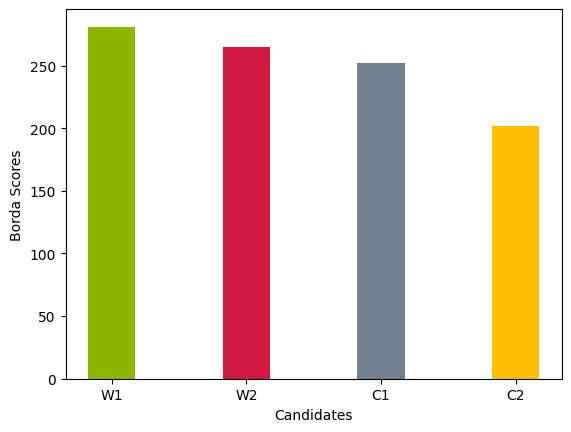

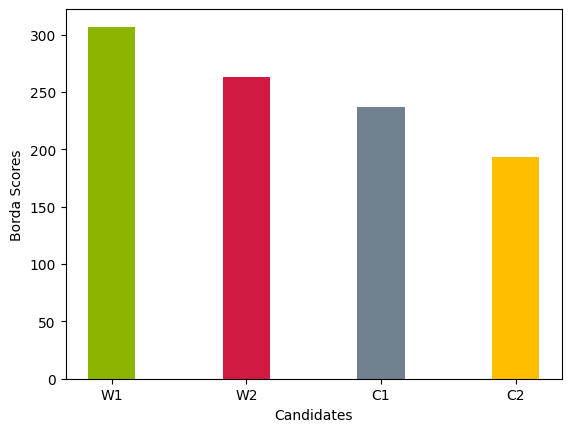

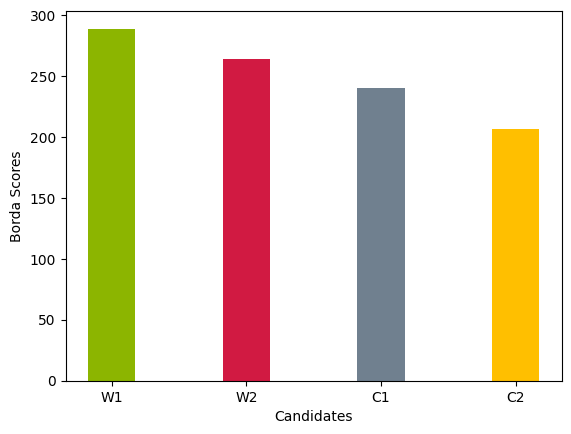

In [51]:
for generator in bgs:
    profile = generator.generate_profile(number_of_ballots)
    fig = plot_summary_stats(profile, 'borda')
    first_place_plots.append(fig)

(1, 2, 3, 4)
(1, 2, 4, 3)
(1, 3, 4, 2)
(1, 3, 2, 4)
(1, 4, 2, 3)
(1, 4, 3, 2)
(2, 3, 4, 1)
(2, 3, 1, 4)
(2, 4, 1, 3)
(2, 4, 3, 1)
(2, 1, 3, 4)
(2, 1, 4, 3)
(3, 4, 1, 2)
(3, 4, 2, 1)
(3, 1, 2, 4)
(3, 1, 4, 2)
(3, 2, 4, 1)
(3, 2, 1, 4)
(4, 1, 2, 3)
(4, 1, 3, 2)
(4, 2, 3, 1)
(4, 2, 1, 3)
(4, 3, 1, 2)


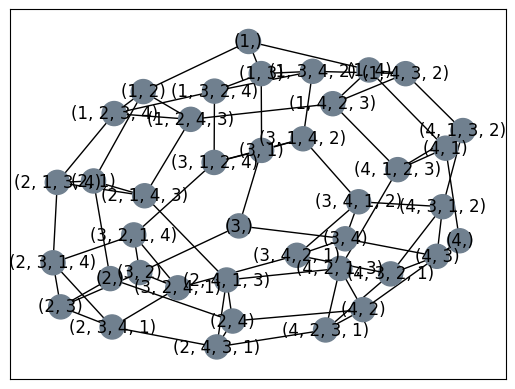

In [55]:
from votekit.graphs.ballot_graph import BallotGraph

# for generator in bgs:
#     profile = generator.generate_profile(number_of_ballots)
#     graph = BallotGraph(profile)
#     graph.draw()

profile = ic.generate_profile(number_of_ballots)
graph = BallotGraph(profile)
graph.draw()

(1, 2, 3, 4)
(1, 2, 4, 3)
(1, 3, 4, 2)
(1, 3, 2, 4)
(1, 4, 2, 3)
(1, 4, 3, 2)
(2, 1, 4, 3)
(3, 4, 1, 2)
(3, 4, 2, 1)
(3, 1, 2, 4)
(3, 1, 4, 2)
(3, 2, 4, 1)
(3, 2, 1, 4)
(4, 1, 2, 3)
(4, 1, 3, 2)
(4, 2, 1, 3)
(4, 3, 1, 2)
(4, 3, 2, 1)


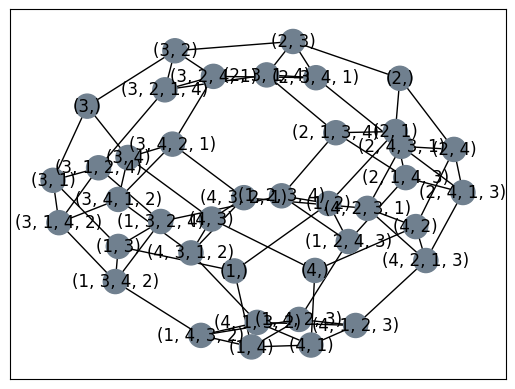

In [56]:
profile = iac.generate_profile(number_of_ballots)
graph = BallotGraph(profile)
graph.draw()

(1, 2, 3, 4)
(1, 2, 4, 3)
(1, 3, 4, 2)
(1, 3, 2, 4)
(1, 4, 2, 3)
(1, 4, 3, 2)
(2, 3, 4, 1)
(2, 3, 1, 4)
(2, 4, 1, 3)
(2, 4, 3, 1)
(2, 1, 3, 4)
(2, 1, 4, 3)
(3, 4, 1, 2)
(3, 4, 2, 1)
(3, 1, 2, 4)
(3, 1, 4, 2)
(3, 2, 4, 1)
(3, 2, 1, 4)
(4, 1, 2, 3)
(4, 1, 3, 2)
(4, 2, 3, 1)
(4, 2, 1, 3)
(4, 3, 1, 2)
(4, 3, 2, 1)


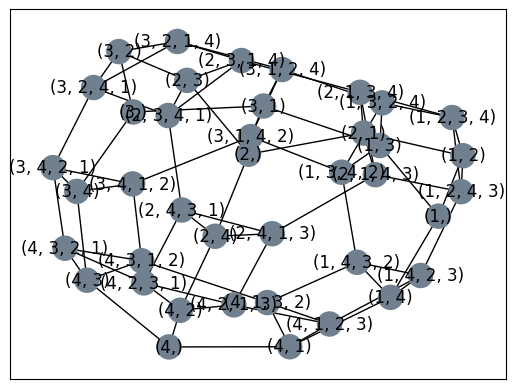

In [57]:
profile = pl.generate_profile(number_of_ballots)
graph = BallotGraph(profile)
graph.draw()

(1, 2, 3, 4)
(1, 2, 4, 3)
(1, 3, 4, 2)
(1, 3, 2, 4)
(1, 4, 2, 3)
(1, 4, 3, 2)
(2, 3, 4, 1)
(2, 3, 1, 4)
(2, 4, 1, 3)
(2, 4, 3, 1)
(2, 1, 3, 4)
(2, 1, 4, 3)
(3, 1, 2, 4)
(3, 1, 4, 2)
(3, 2, 4, 1)
(3, 2, 1, 4)
(4, 1, 2, 3)
(4, 2, 3, 1)
(4, 2, 1, 3)
(4, 3, 1, 2)
(4, 3, 2, 1)


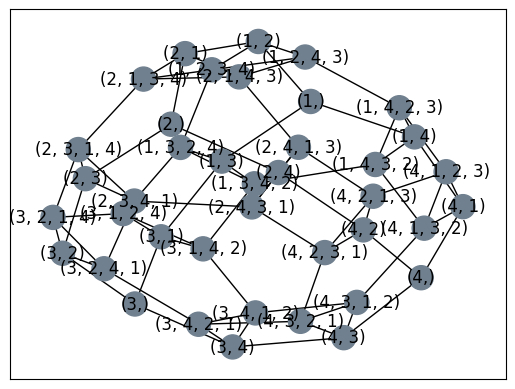

In [58]:
profile = bt.generate_profile(number_of_ballots)
graph = BallotGraph(profile)
graph.draw()

(1, 2, 4, 3)
(1, 3, 2, 4)
(1, 4, 2, 3)
(2, 3, 1, 4)
(2, 4, 1, 3)
(3, 4, 2, 1)
(3, 1, 4, 2)
(3, 2, 4, 1)
(4, 1, 3, 2)
(4, 2, 3, 1)


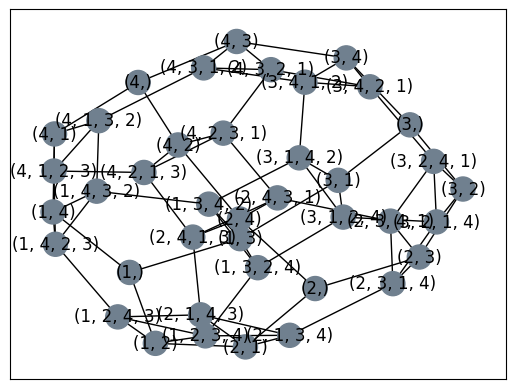

In [59]:
profile = ac.generate_profile(number_of_ballots)
graph = BallotGraph(profile)
graph.draw()